In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates
import datetime
import mplfinance as mpf
import matplotlib.ticker as ticker
import seaborn as sb

plt.rcParams['font.family'] = 'AppleGothic'
%matplotlib inline

# 데이터셋 불러오기
cd = pd.read_csv("/Users/BigData/Python/프로젝트1/faang_stocks_pandemic_data.csv")
cd

,Unnamed: 0,Date,High,Low,Open,Close,Volume,Adj Close,Name
0,683,2020-01-02,209.789993,206.270004,206.750000,209.779999,12077100.0,209.779999,Facebook
1,684,2020-01-03,210.399994,206.949997,207.210007,208.669998,11188400.0,208.669998,Facebook
2,685,2020-01-06,212.779999,206.520004,206.699997,212.600006,17058900.0,212.600006,Facebook
3,686,2020-01-07,214.580002,211.750000,212.820007,213.059998,14912400.0,213.059998,Facebook
4,687,2020-01-08,216.240005,212.610001,213.000000,215.220001,13475000.0,215.220001,Facebook
...,...,...,...,...,...,...,...,...,...
2835,1246,2022-03-28,2840.050049,2796.229980,2818.010010,2829.110107,1752500.0,2829.110107,Google
2836,1247,2022-03-29,2875.870117,2840.770020,2852.949951,2850.110107,1715900.0,2850.110107,Google
2837,1248,2022-03-30,2854.409912,2832.000000,2849.199951,2838.770020,994200.0,2838.770020,Google
2838,1249,2022-03-31,2842.159912,2780.489990,2841.060059,2781.350098,1876200.0,2781.350098,Google


In [139]:
# 필요한 컬럼만 추출
cd = cd.loc[:, ['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Name']]
cd

,Date,High,Low,Open,Close,Volume,Adj Close,Name
0,2020-01-02,209.789993,206.270004,206.750000,209.779999,12077100.0,209.779999,Facebook
1,2020-01-03,210.399994,206.949997,207.210007,208.669998,11188400.0,208.669998,Facebook
2,2020-01-06,212.779999,206.520004,206.699997,212.600006,17058900.0,212.600006,Facebook
3,2020-01-07,214.580002,211.750000,212.820007,213.059998,14912400.0,213.059998,Facebook
4,2020-01-08,216.240005,212.610001,213.000000,215.220001,13475000.0,215.220001,Facebook
...,...,...,...,...,...,...,...,...
2835,2022-03-28,2840.050049,2796.229980,2818.010010,2829.110107,1752500.0,2829.110107,Google
2836,2022-03-29,2875.870117,2840.770020,2852.949951,2850.110107,1715900.0,2850.110107,Google
2837,2022-03-30,2854.409912,2832.000000,2849.199951,2838.770020,994200.0,2838.770020,Google
2838,2022-03-31,2842.159912,2780.489990,2841.060059,2781.350098,1876200.0,2781.350098,Google


In [140]:
# 선별한 컬럼에서 기업 이름으로 분리
found = cd['Name'] == 'Facebook'
fb = cd[found]
fb

,Date,High,Low,Open,Close,Volume,Adj Close,Name
0,2020-01-02,209.789993,206.270004,206.750000,209.779999,12077100.0,209.779999,Facebook
1,2020-01-03,210.399994,206.949997,207.210007,208.669998,11188400.0,208.669998,Facebook
2,2020-01-06,212.779999,206.520004,206.699997,212.600006,17058900.0,212.600006,Facebook
3,2020-01-07,214.580002,211.750000,212.820007,213.059998,14912400.0,213.059998,Facebook
4,2020-01-08,216.240005,212.610001,213.000000,215.220001,13475000.0,215.220001,Facebook
...,...,...,...,...,...,...,...,...
563,2022-03-28,224.039993,219.539993,222.130005,223.589996,26224100.0,223.589996,Facebook
564,2022-03-29,230.889999,225.289993,226.070007,229.860001,31417900.0,229.860001,Facebook
565,2022-03-30,231.149994,226.710007,228.910004,227.850006,25588000.0,227.850006,Facebook
566,2022-03-31,228.490005,222.259995,228.449997,222.360001,24192300.0,222.360001,Facebook


In [141]:
# 선별한 컬럼에서 기업 이름으로 분리
found = cd['Name'] == 'Amazon'
az = cd[found]
az

,Date,High,Low,Open,Close,Volume,Adj Close,Name
568,2020-01-02,1898.010010,1864.150024,1875.000000,1898.010010,4029000.0,1898.010010,Amazon
569,2020-01-03,1886.199951,1864.500000,1864.500000,1874.969971,3764400.0,1874.969971,Amazon
570,2020-01-06,1903.689941,1860.000000,1860.000000,1902.880005,4061800.0,1902.880005,Amazon
571,2020-01-07,1913.890015,1892.040039,1904.500000,1906.859985,4044900.0,1906.859985,Amazon
572,2020-01-08,1911.000000,1886.439941,1898.040039,1891.969971,3508000.0,1891.969971,Amazon
...,...,...,...,...,...,...,...,...
1131,2022-03-28,3380.750000,3298.000000,3299.500000,3379.810059,2992700.0,3379.810059,Amazon
1132,2022-03-29,3416.629883,3357.370117,3407.679932,3386.300049,3307700.0,3386.300049,Amazon
1133,2022-03-30,3379.010010,3310.000000,3370.189941,3326.020020,2808400.0,3326.020020,Amazon
1134,2022-03-31,3329.899902,3259.070068,3328.899902,3259.949951,2998300.0,3259.949951,Amazon


In [142]:
# 선별한 컬럼에서 기업 이름으로 분리
found = cd['Name'] == 'Apple'
ap = cd[found]
ap

,Date,High,Low,Open,Close,Volume,Adj Close,Name
1136,2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,73.894318,Apple
1137,2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.175919,Apple
1138,2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,73.759018,Apple
1139,2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.412109,Apple
1140,2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,74.593040,Apple
...,...,...,...,...,...,...,...,...
1699,2022-03-28,175.729996,172.000000,172.169998,175.600006,90371900.0,175.600006,Apple
1700,2022-03-29,179.009995,176.339996,176.690002,178.960007,100589400.0,178.960007,Apple
1701,2022-03-30,179.610001,176.699997,178.550003,177.770004,92633200.0,177.770004,Apple
1702,2022-03-31,178.029999,174.399994,177.839996,174.610001,103049300.0,174.610001,Apple


In [143]:
# 선별한 컬럼에서 기업 이름으로 분리
found = cd['Name'] == 'Netflix'
nf = cd[found]
nf

,Date,High,Low,Open,Close,Volume,Adj Close,Name
1704,2020-01-02,329.980011,324.779999,326.100006,329.809998,4485800.0,329.809998,Netflix
1705,2020-01-03,329.859985,325.529999,326.779999,325.899994,3806900.0,325.899994,Netflix
1706,2020-01-06,336.359985,321.200012,323.119995,335.829987,5663100.0,335.829987,Netflix
1707,2020-01-07,336.700012,330.299988,336.470001,330.750000,4703200.0,330.750000,Netflix
1708,2020-01-08,342.700012,331.049988,331.489990,339.260010,7104500.0,339.260010,Netflix
...,...,...,...,...,...,...,...,...
2267,2022-03-28,380.279999,366.730011,375.230011,378.510010,4323400.0,378.510010,Netflix
2268,2022-03-29,396.500000,380.329987,384.390015,391.820007,5880700.0,391.820007,Netflix
2269,2022-03-30,392.700012,378.630005,389.549988,381.470001,4023300.0,381.470001,Netflix
2270,2022-03-31,384.000000,373.609985,383.589996,374.589996,4134700.0,374.589996,Netflix


In [144]:
# 선별한 컬럼에서 기업 이름으로 분리
found = cd['Name'] == 'Google'
gg = cd[found]
gg

,Date,High,Low,Open,Close,Volume,Adj Close,Name
2272,2020-01-02,1368.680054,1346.489990,1348.410034,1368.680054,1363900.0,1368.680054,Google
2273,2020-01-03,1373.750000,1347.319946,1348.000000,1361.520020,1170400.0,1361.520020,Google
2274,2020-01-06,1398.319946,1351.000000,1351.630005,1397.810059,2338400.0,1397.810059,Google
2275,2020-01-07,1403.500000,1391.560059,1400.459961,1395.109985,1716500.0,1395.109985,Google
2276,2020-01-08,1411.849976,1392.630005,1394.819946,1405.040039,1765700.0,1405.040039,Google
...,...,...,...,...,...,...,...,...
2835,2022-03-28,2840.050049,2796.229980,2818.010010,2829.110107,1752500.0,2829.110107,Google
2836,2022-03-29,2875.870117,2840.770020,2852.949951,2850.110107,1715900.0,2850.110107,Google
2837,2022-03-30,2854.409912,2832.000000,2849.199951,2838.770020,994200.0,2838.770020,Google
2838,2022-03-31,2842.159912,2780.489990,2841.060059,2781.350098,1876200.0,2781.350098,Google


In [145]:
# 인덱스를 Date로 변경 후 년도롤 검색 가능하게 하려 했으나 데이터 타입 변경이 안됌
# 그래서 데이터 타입이 테이터타임인 데이트 컬럼을 추가해서 인덱스로 지정함
fb['fbdate'] = pd.to_datetime(fb['Date'])
# 인덱스 설정
fbi = fb.set_index('fbdate')
fbi

/var/folders/j6/m7t5m6h978134_qwyw9q1nw00000gn/T/ipykernel_806/3910013187.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fb['fbdate'] = pd.to_datetime(fb['Date'])


,Date,High,Low,Open,Close,Volume,Adj Close,Name
fbdate,,,,,,,,
2020-01-02,2020-01-02,209.789993,206.270004,206.750000,209.779999,12077100.0,209.779999,Facebook
2020-01-03,2020-01-03,210.399994,206.949997,207.210007,208.669998,11188400.0,208.669998,Facebook
2020-01-06,2020-01-06,212.779999,206.520004,206.699997,212.600006,17058900.0,212.600006,Facebook
2020-01-07,2020-01-07,214.580002,211.750000,212.820007,213.059998,14912400.0,213.059998,Facebook
2020-01-08,2020-01-08,216.240005,212.610001,213.000000,215.220001,13475000.0,215.220001,Facebook
...,...,...,...,...,...,...,...,...
2022-03-28,2022-03-28,224.039993,219.539993,222.130005,223.589996,26224100.0,223.589996,Facebook
2022-03-29,2022-03-29,230.889999,225.289993,226.070007,229.860001,31417900.0,229.860001,Facebook
2022-03-30,2022-03-30,231.149994,226.710007,228.910004,227.850006,25588000.0,227.850006,Facebook


In [146]:
ap['apdate'] = pd.to_datetime(ap['Date'])
api = ap.set_index('apdate')
api

/var/folders/j6/m7t5m6h978134_qwyw9q1nw00000gn/T/ipykernel_806/192212204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap['apdate'] = pd.to_datetime(ap['Date'])


,Date,High,Low,Open,Close,Volume,Adj Close,Name
apdate,,,,,,,,
2020-01-02,2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,73.894318,Apple
2020-01-03,2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.175919,Apple
2020-01-06,2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,73.759018,Apple
2020-01-07,2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.412109,Apple
2020-01-08,2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,74.593040,Apple
...,...,...,...,...,...,...,...,...
2022-03-28,2022-03-28,175.729996,172.000000,172.169998,175.600006,90371900.0,175.600006,Apple
2022-03-29,2022-03-29,179.009995,176.339996,176.690002,178.960007,100589400.0,178.960007,Apple
2022-03-30,2022-03-30,179.610001,176.699997,178.550003,177.770004,92633200.0,177.770004,Apple


In [147]:
az['azdate'] = pd.to_datetime(az['Date'])
azi = az.set_index('azdate')
azi

/var/folders/j6/m7t5m6h978134_qwyw9q1nw00000gn/T/ipykernel_806/3617847190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  az['azdate'] = pd.to_datetime(az['Date'])


,Date,High,Low,Open,Close,Volume,Adj Close,Name
azdate,,,,,,,,
2020-01-02,2020-01-02,1898.010010,1864.150024,1875.000000,1898.010010,4029000.0,1898.010010,Amazon
2020-01-03,2020-01-03,1886.199951,1864.500000,1864.500000,1874.969971,3764400.0,1874.969971,Amazon
2020-01-06,2020-01-06,1903.689941,1860.000000,1860.000000,1902.880005,4061800.0,1902.880005,Amazon
2020-01-07,2020-01-07,1913.890015,1892.040039,1904.500000,1906.859985,4044900.0,1906.859985,Amazon
2020-01-08,2020-01-08,1911.000000,1886.439941,1898.040039,1891.969971,3508000.0,1891.969971,Amazon
...,...,...,...,...,...,...,...,...
2022-03-28,2022-03-28,3380.750000,3298.000000,3299.500000,3379.810059,2992700.0,3379.810059,Amazon
2022-03-29,2022-03-29,3416.629883,3357.370117,3407.679932,3386.300049,3307700.0,3386.300049,Amazon
2022-03-30,2022-03-30,3379.010010,3310.000000,3370.189941,3326.020020,2808400.0,3326.020020,Amazon


In [148]:
nf['nfdate'] = pd.to_datetime(nf['Date'])
nfi = nf.set_index('nfdate')
nfi

/var/folders/j6/m7t5m6h978134_qwyw9q1nw00000gn/T/ipykernel_806/1412372485.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nf['nfdate'] = pd.to_datetime(nf['Date'])


,Date,High,Low,Open,Close,Volume,Adj Close,Name
nfdate,,,,,,,,
2020-01-02,2020-01-02,329.980011,324.779999,326.100006,329.809998,4485800.0,329.809998,Netflix
2020-01-03,2020-01-03,329.859985,325.529999,326.779999,325.899994,3806900.0,325.899994,Netflix
2020-01-06,2020-01-06,336.359985,321.200012,323.119995,335.829987,5663100.0,335.829987,Netflix
2020-01-07,2020-01-07,336.700012,330.299988,336.470001,330.750000,4703200.0,330.750000,Netflix
2020-01-08,2020-01-08,342.700012,331.049988,331.489990,339.260010,7104500.0,339.260010,Netflix
...,...,...,...,...,...,...,...,...
2022-03-28,2022-03-28,380.279999,366.730011,375.230011,378.510010,4323400.0,378.510010,Netflix
2022-03-29,2022-03-29,396.500000,380.329987,384.390015,391.820007,5880700.0,391.820007,Netflix
2022-03-30,2022-03-30,392.700012,378.630005,389.549988,381.470001,4023300.0,381.470001,Netflix


In [149]:
gg['ggdate'] = pd.to_datetime(gg['Date'])
ggi = gg.set_index('ggdate')
ggi

/var/folders/j6/m7t5m6h978134_qwyw9q1nw00000gn/T/ipykernel_806/1877571014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gg['ggdate'] = pd.to_datetime(gg['Date'])


,Date,High,Low,Open,Close,Volume,Adj Close,Name
ggdate,,,,,,,,
2020-01-02,2020-01-02,1368.680054,1346.489990,1348.410034,1368.680054,1363900.0,1368.680054,Google
2020-01-03,2020-01-03,1373.750000,1347.319946,1348.000000,1361.520020,1170400.0,1361.520020,Google
2020-01-06,2020-01-06,1398.319946,1351.000000,1351.630005,1397.810059,2338400.0,1397.810059,Google
2020-01-07,2020-01-07,1403.500000,1391.560059,1400.459961,1395.109985,1716500.0,1395.109985,Google
2020-01-08,2020-01-08,1411.849976,1392.630005,1394.819946,1405.040039,1765700.0,1405.040039,Google
...,...,...,...,...,...,...,...,...
2022-03-28,2022-03-28,2840.050049,2796.229980,2818.010010,2829.110107,1752500.0,2829.110107,Google
2022-03-29,2022-03-29,2875.870117,2840.770020,2852.949951,2850.110107,1715900.0,2850.110107,Google
2022-03-30,2022-03-30,2854.409912,2832.000000,2849.199951,2838.770020,994200.0,2838.770020,Google


In [150]:
# High, Low 데이터
fbi_HL = fbi[['High', "Low"]]
fbi_HL.head()

,High,Low
fbdate,,
2020-01-02,209.789993,206.270004
2020-01-03,210.399994,206.949997
2020-01-06,212.779999,206.520004
2020-01-07,214.580002,211.750000
2020-01-08,216.240005,212.610001


/var/folders/j6/m7t5m6h978134_qwyw9q1nw00000gn/T/ipykernel_806/1209246258.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  fbi_HL['2020'].plot(title='FaceBook 2020 High vs Low', figsize=(15,10))


<AxesSubplot:title={'center':'FaceBook 2020 High vs Low'}, xlabel='fbdate'>

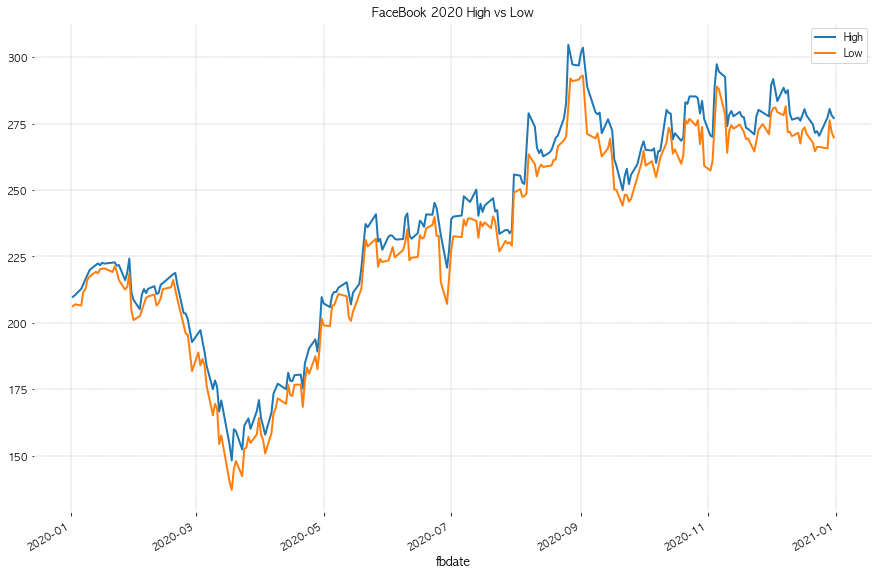

In [151]:
# 2020 페이스북 주가 High, Low
fbi_HL['2020'].plot(title='FaceBook 2020 High vs Low', figsize=(15,10))

/var/folders/j6/m7t5m6h978134_qwyw9q1nw00000gn/T/ipykernel_806/683498260.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  fbi_HL['2020-01'].plot(title='FaceBook 2020-01 High vs Low', figsize=(15,10))


<AxesSubplot:title={'center':'FaceBook 2020-01 High vs Low'}, xlabel='fbdate'>

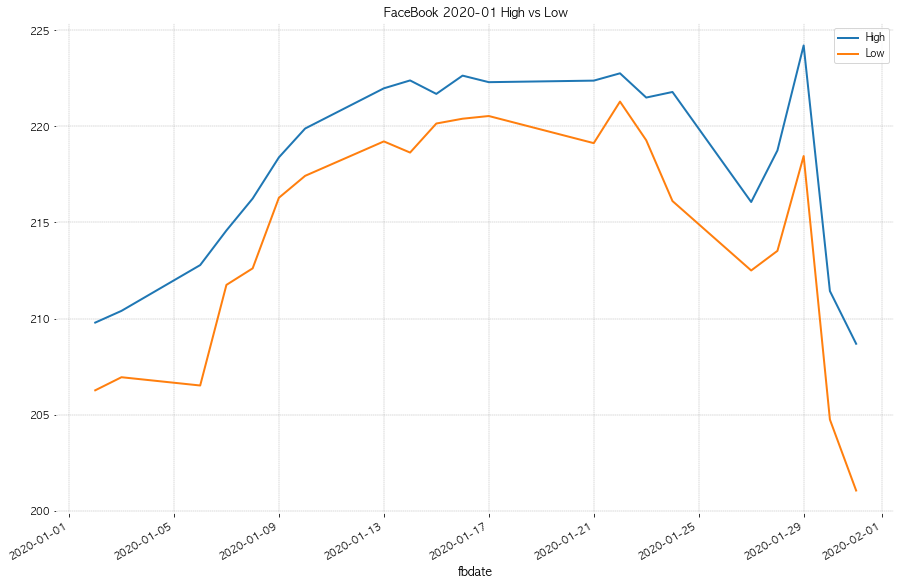

In [152]:
# 2020-01 페이스북 주가 High, Low
fbi_HL['2020-01'].plot(title='FaceBook 2020-01 High vs Low', figsize=(15,10))

In [153]:
# FaceBook 주식 시작가 종료가
fbi_OC = fbi[['Open', "Close"]]
fbi_OC

,Open,Close
fbdate,,
2020-01-02,206.750000,209.779999
2020-01-03,207.210007,208.669998
2020-01-06,206.699997,212.600006
2020-01-07,212.820007,213.059998
2020-01-08,213.000000,215.220001
...,...,...
2022-03-28,222.130005,223.589996
2022-03-29,226.070007,229.860001
2022-03-30,228.910004,227.850006


/var/folders/j6/m7t5m6h978134_qwyw9q1nw00000gn/T/ipykernel_806/3856722880.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  fbi_OC['2020'].plot(title='FaceBook 2020 Open vs Close', figsize=(15,10))


<AxesSubplot:title={'center':'FaceBook 2020 Open vs Close'}, xlabel='fbdate'>

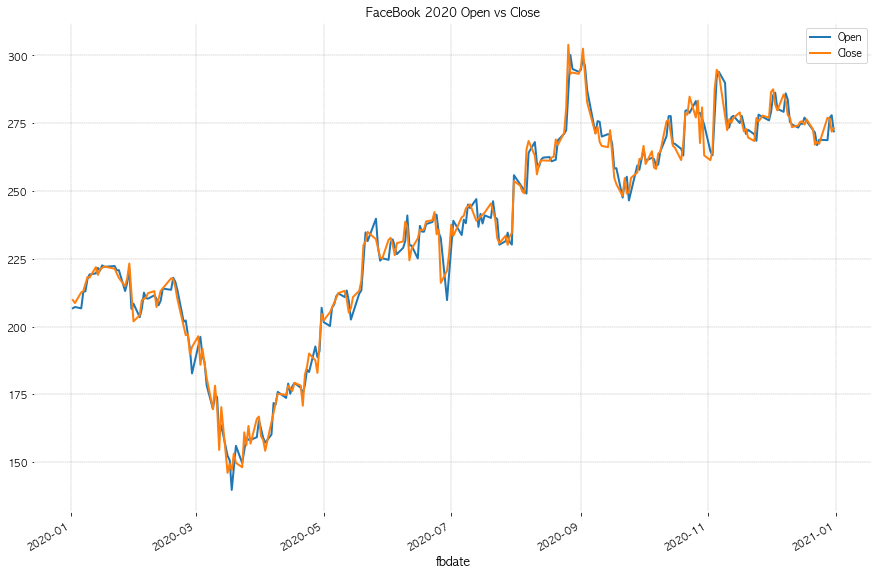

In [154]:
# 2020 주가 Open, Close
fbi_OC['2020'].plot(title='FaceBook 2020 Open vs Close', figsize=(15,10))

/var/folders/j6/m7t5m6h978134_qwyw9q1nw00000gn/T/ipykernel_806/3642973239.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  fbi_OC['2020-01'].plot(title='FaceBook 2020 Open vs Close', figsize=(15,10))


<AxesSubplot:title={'center':'FaceBook 2020 Open vs Close'}, xlabel='fbdate'>

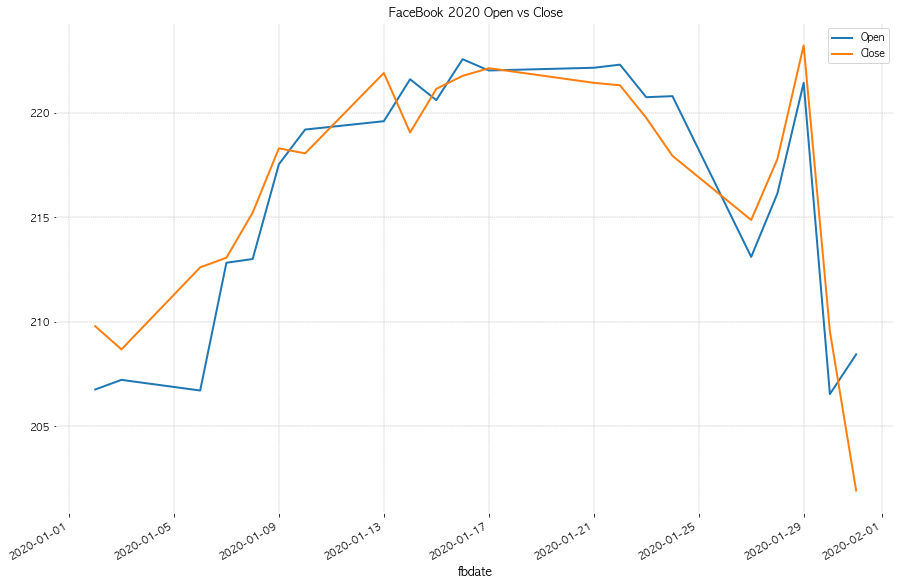

In [155]:
# 2020-01 페이스북 주가 Open, Close
fbi_OC['2020-01'].plot(title='FaceBook 2020 Open vs Close', figsize=(15,10))

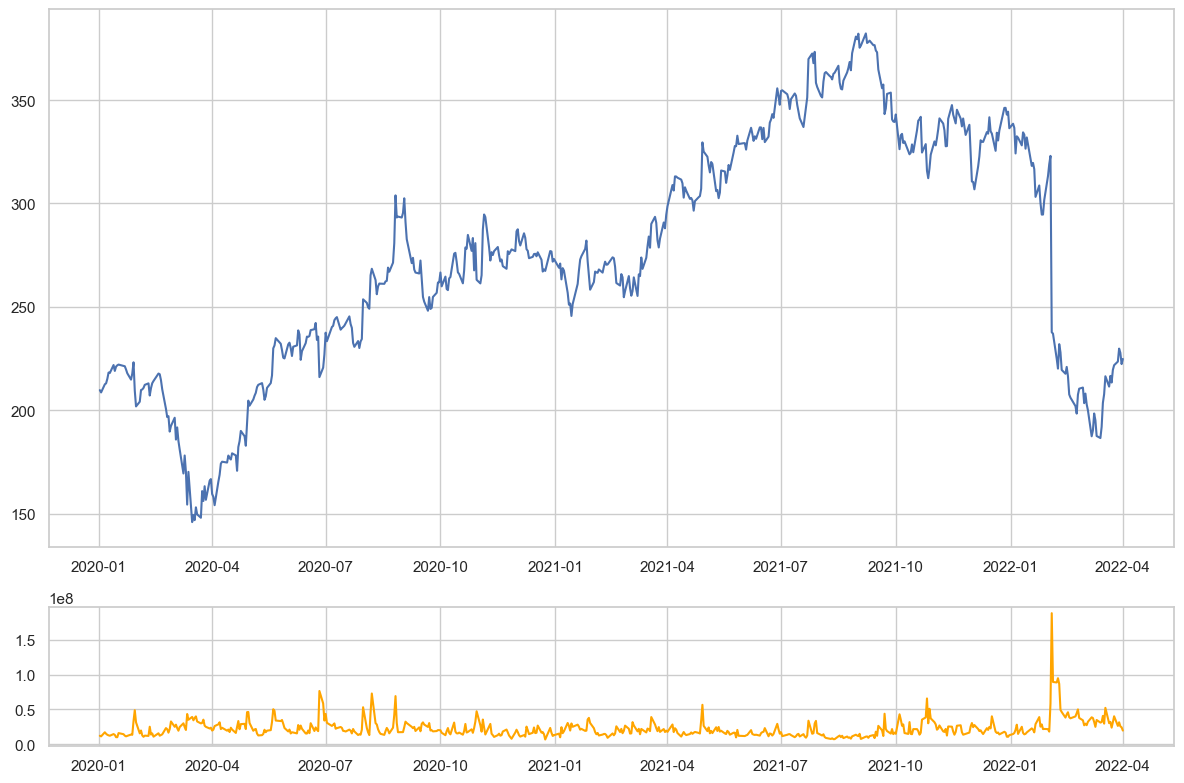

In [182]:
# FaceBook 종가와 거래량
fig = plt.figure(figsize=(12, 8))
top_axes = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan=4) # 종가
bottom_axes = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4) # 거래량

top_axes.plot(fbi.index, fbi['Adj Close'], label='Adjusted Close', color='b') # 
bottom_axes.plot(fbi.index, fbi['Volume'], label='Volume', color='orange')

plt.tight_layout() #그래프 크기를 자동으로 조절하는 함수
plt.show()

In [157]:
# FaceBook 2022년 데이터
fbic = fbi['2022']
fbic

/var/folders/j6/m7t5m6h978134_qwyw9q1nw00000gn/T/ipykernel_806/3157296210.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  fbic = fbi['2022']


,Date,High,Low,Open,Close,Volume,Adj Close,Name
fbdate,,,,,,,,
2022-01-03,2022-01-03,341.079987,337.190002,338.299988,338.540009,14537900.0,338.540009,Facebook
2022-01-04,2022-01-04,343.089996,331.869995,339.950012,336.529999,15998000.0,336.529999,Facebook
2022-01-05,2022-01-05,335.760010,323.839996,333.019989,324.170013,20564500.0,324.170013,Facebook
2022-01-06,2022-01-06,339.170013,322.720001,322.820007,332.459991,27962800.0,332.459991,Facebook
2022-01-07,2022-01-07,337.000000,328.880005,332.739990,331.790009,14722000.0,331.790009,Facebook
...,...,...,...,...,...,...,...,...
2022-03-28,2022-03-28,224.039993,219.539993,222.130005,223.589996,26224100.0,223.589996,Facebook
2022-03-29,2022-03-29,230.889999,225.289993,226.070007,229.860001,31417900.0,229.860001,Facebook
2022-03-30,2022-03-30,231.149994,226.710007,228.910004,227.850006,25588000.0,227.850006,Facebook


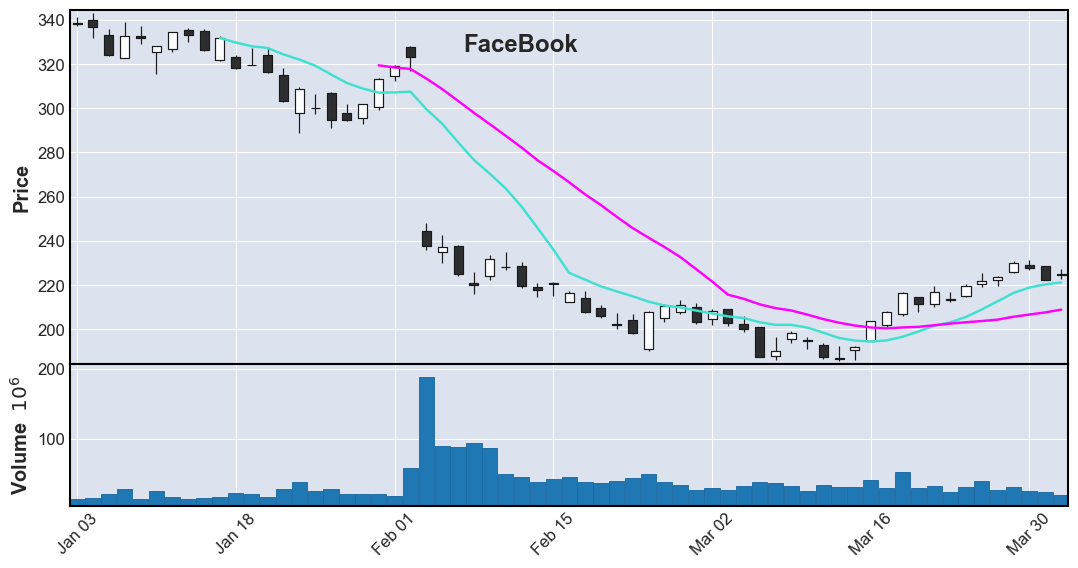

In [158]:
# FaceBook 2022년 주가 캔들차트
# 거래량이 제일 많았던 기간으로 선정
mpf.plot(fbic, 
         type='candle', # 캔들차트
         mav=(10, 20), # 10일, 20일 이동 평균선
         volume=True, # 거래량
         title='FaceBook', # 그래프 타이틀
         figratio=(10,5), # 그래프 크기
         tight_layout=True) # 좌우 공백제거
plt.show()

In [159]:
# 인덱스 설정
ap['adate'] = pd.to_datetime(ap['Date'])
api = ap.set_index(ap['adate'])
api['2020']

/var/folders/j6/m7t5m6h978134_qwyw9q1nw00000gn/T/ipykernel_806/2223418363.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap['adate'] = pd.to_datetime(ap['Date'])
/var/folders/j6/m7t5m6h978134_qwyw9q1nw00000gn/T/ipykernel_806/2223418363.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  api['2020']


,Date,High,Low,Open,Close,Volume,Adj Close,Name,apdate,adate
adate,,,,,,,,,,
2020-01-02,2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,73.894318,Apple,2020-01-02,2020-01-02
2020-01-03,2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.175919,Apple,2020-01-03,2020-01-03
2020-01-06,2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,73.759018,Apple,2020-01-06,2020-01-06
2020-01-07,2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.412109,Apple,2020-01-07,2020-01-07
2020-01-08,2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,74.593040,Apple,2020-01-08,2020-01-08
...,...,...,...,...,...,...,...,...,...,...
2020-12-24,2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,130.994522,Apple,2020-12-24,2020-12-24
2020-12-28,2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,135.679657,Apple,2020-12-28,2020-12-28
2020-12-29,2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,133.873077,Apple,2020-12-29,2020-12-29


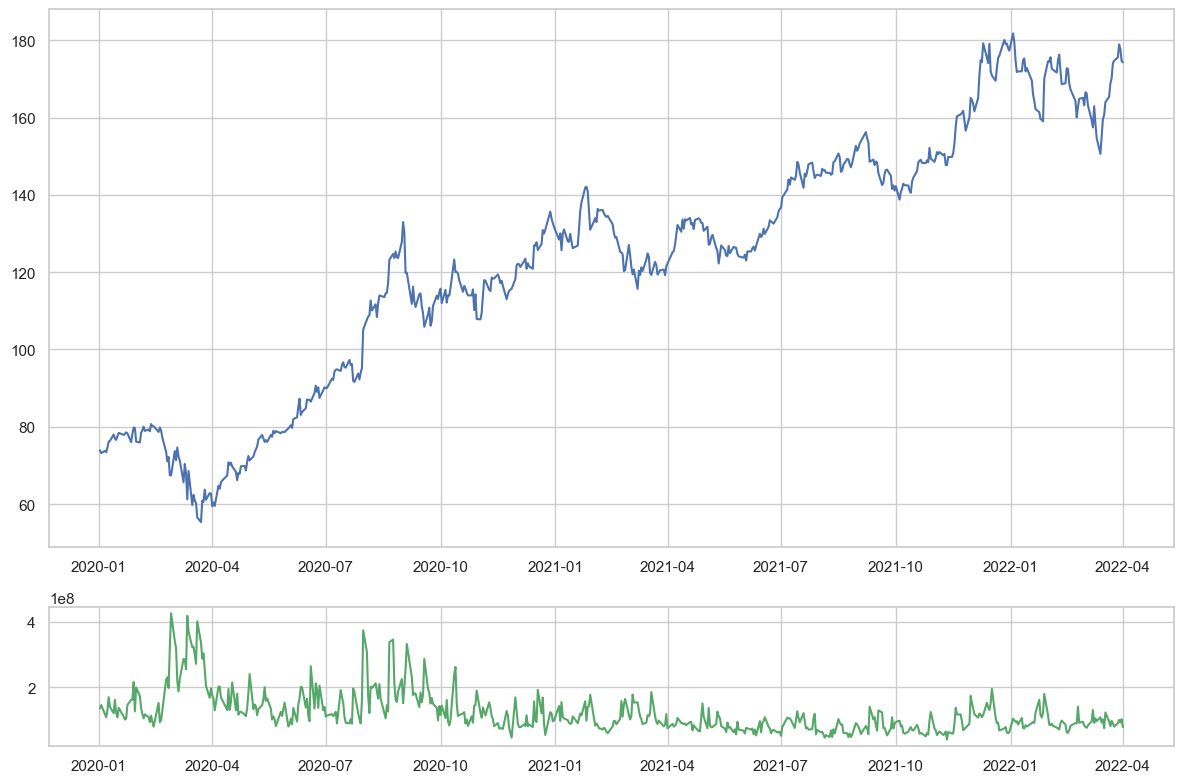

In [183]:
# Apple 종가와 거래량
fig = plt.figure(figsize=(12, 8))
top_axes = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan=4) # 종가
bottom_axes = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4) # 거래량

top_axes.plot(api.index, api['Adj Close'], label='Adjusted Close', color='b')
bottom_axes.plot(api.index, api['Volume'], label='Volume', color='g')

plt.tight_layout() #그래프 크기를 자동으로 조절하는 함수
plt.show()

In [161]:
apic = api['2020']
apic

/var/folders/j6/m7t5m6h978134_qwyw9q1nw00000gn/T/ipykernel_806/3858385443.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  apic = api['2020']


,Date,High,Low,Open,Close,Volume,Adj Close,Name,apdate,adate
adate,,,,,,,,,,
2020-01-02,2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,73.894318,Apple,2020-01-02,2020-01-02
2020-01-03,2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.175919,Apple,2020-01-03,2020-01-03
2020-01-06,2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,73.759018,Apple,2020-01-06,2020-01-06
2020-01-07,2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.412109,Apple,2020-01-07,2020-01-07
2020-01-08,2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,74.593040,Apple,2020-01-08,2020-01-08
...,...,...,...,...,...,...,...,...,...,...
2020-12-24,2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,130.994522,Apple,2020-12-24,2020-12-24
2020-12-28,2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,135.679657,Apple,2020-12-28,2020-12-28
2020-12-29,2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,133.873077,Apple,2020-12-29,2020-12-29


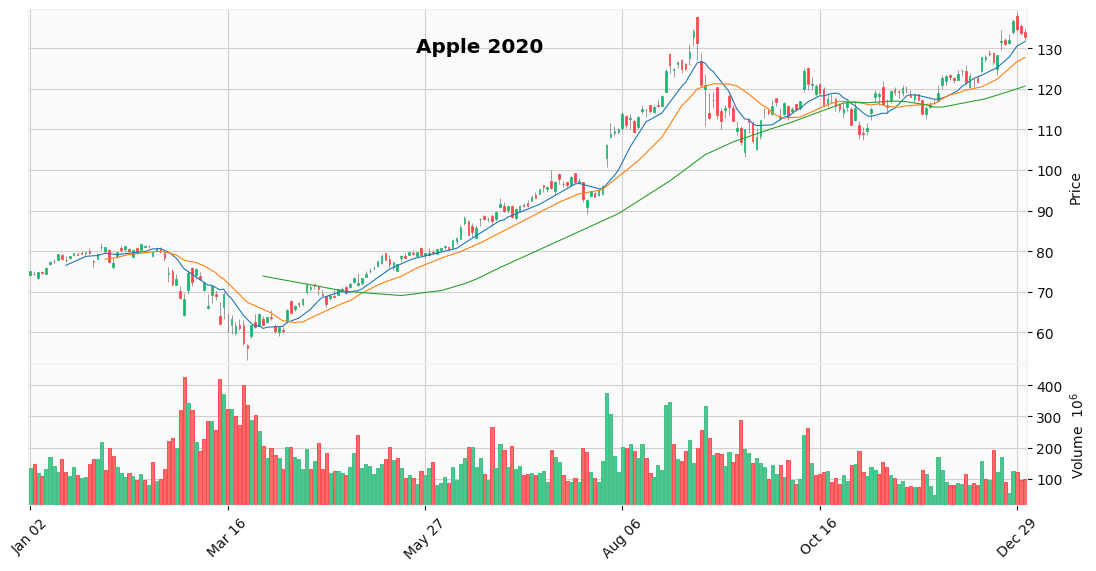

In [162]:
# Apple 2020 주가 캔들차트
mpf.plot(apic, 
         type='candle', # 캔들차트
         mav=(10, 20, 60), # 10일, 20일, 60일 이동 평균선
         volume=True, # 거래량
         style='yahoo', # 그래프 스타일
         title='Apple 2020', # 그래프 타이틀
         figratio=(10,5), # 그래프 크기
         tight_layout=True) # 좌우 공백제거
plt.show()

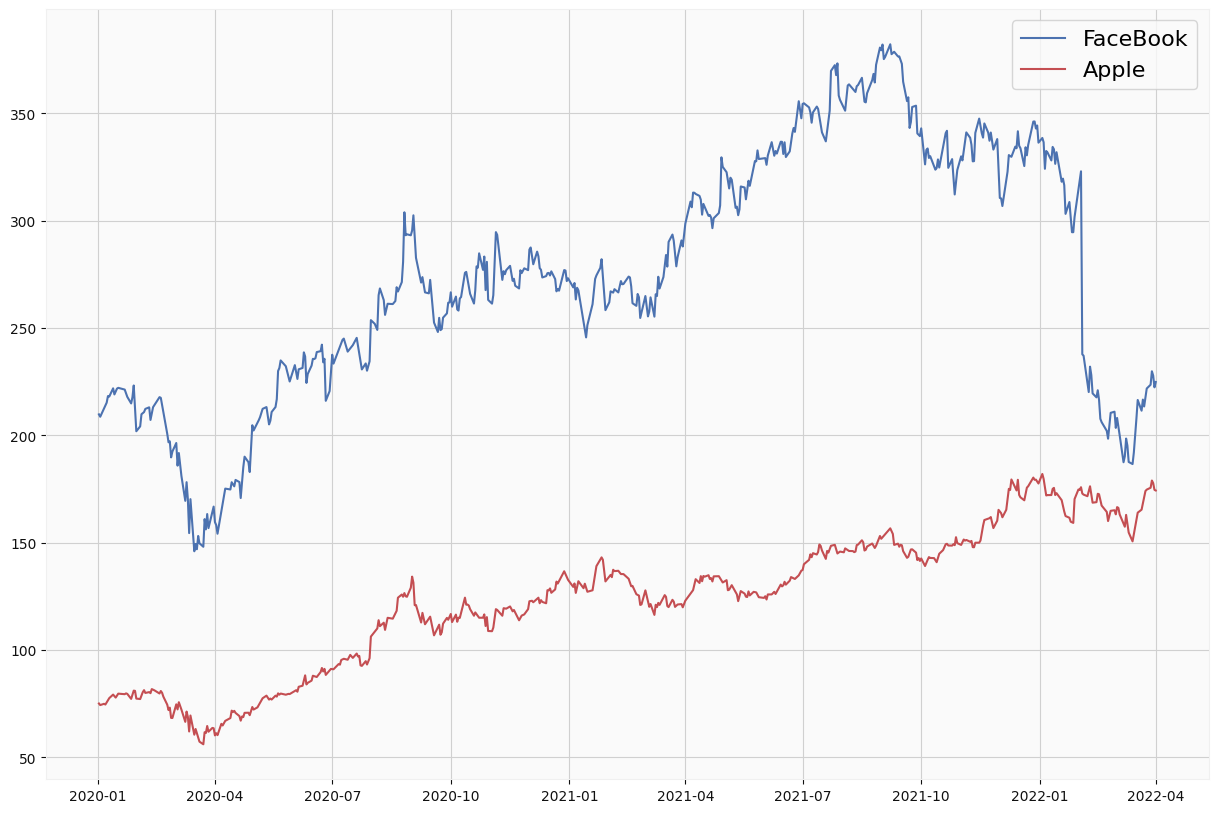

In [163]:
# FaceBook, Apple 주식 종가 비교
plt.figure(figsize=(15,10)) 
plt.plot(fbi['Close'], label="FaceBook", color='b') 
plt.plot(api['Close'], label="Apple", color='r') 
plt.legend(fontsize=16) # 오른쪽 상단 label 상자의 폰트사이즈 조절
plt.show()

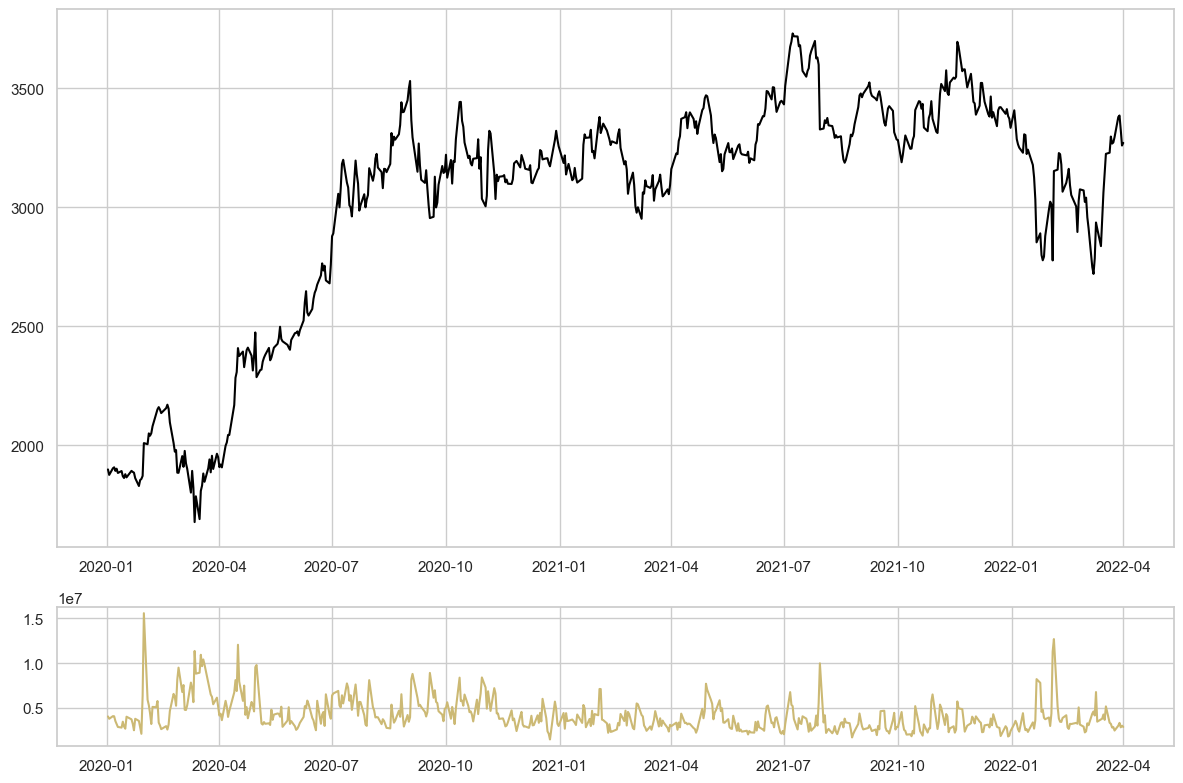

In [180]:
# Amazon 종가와 거래량
fig = plt.figure(figsize=(12, 8))
top_axes = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan=4) # 종가
bottom_axes = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4) # 거래량

top_axes.plot(azi.index, azi['Adj Close'], label='Adjusted Close', color='black')
bottom_axes.plot(azi.index, azi['Volume'], label='Volume', color='y')

plt.tight_layout() #그래프 크기를 자동으로 조절하는 함수
plt.show()

In [165]:
azic = azi['2020']
azic

/var/folders/j6/m7t5m6h978134_qwyw9q1nw00000gn/T/ipykernel_806/36190904.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  azic = azi['2020']


,Date,High,Low,Open,Close,Volume,Adj Close,Name
azdate,,,,,,,,
2020-01-02,2020-01-02,1898.010010,1864.150024,1875.000000,1898.010010,4029000.0,1898.010010,Amazon
2020-01-03,2020-01-03,1886.199951,1864.500000,1864.500000,1874.969971,3764400.0,1874.969971,Amazon
2020-01-06,2020-01-06,1903.689941,1860.000000,1860.000000,1902.880005,4061800.0,1902.880005,Amazon
2020-01-07,2020-01-07,1913.890015,1892.040039,1904.500000,1906.859985,4044900.0,1906.859985,Amazon
2020-01-08,2020-01-08,1911.000000,1886.439941,1898.040039,1891.969971,3508000.0,1891.969971,Amazon
...,...,...,...,...,...,...,...,...
2020-12-24,2020-12-24,3202.000000,3169.000000,3193.899902,3172.689941,1451900.0,3172.689941,Amazon
2020-12-28,2020-12-28,3304.000000,3172.689941,3194.000000,3283.959961,5686800.0,3283.959961,Amazon
2020-12-29,2020-12-29,3350.649902,3281.219971,3309.939941,3322.000000,4872900.0,3322.000000,Amazon


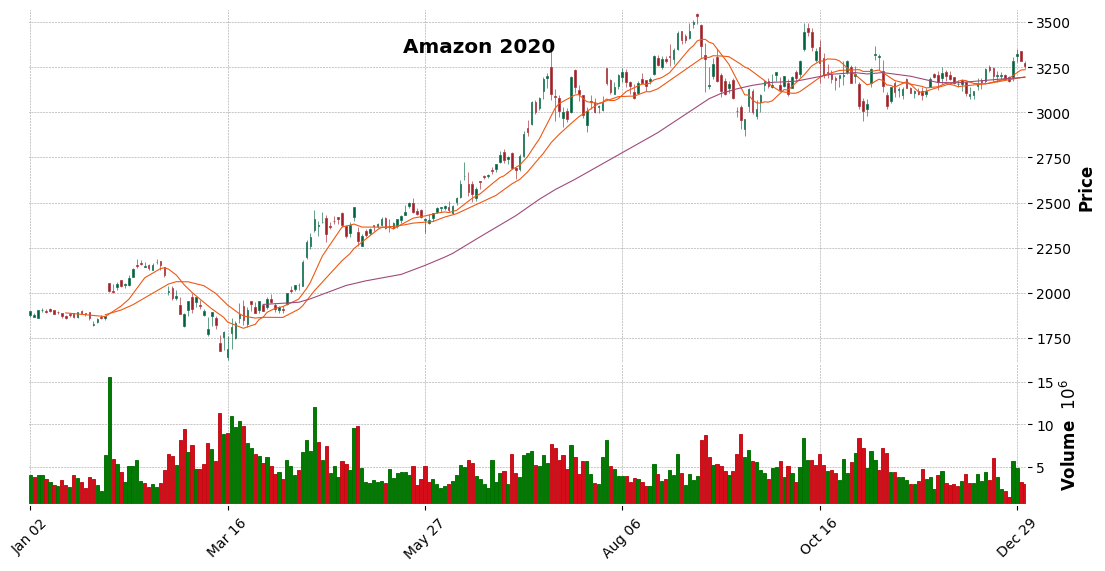

In [166]:
# Aamzon 2020 주가 캔들차트
mpf.plot(azic, 
         type='candle', # 캔들차트
         mav=(10, 20, 60), # 10일, 20일, 60일 이동 평균선
         volume=True, # 거래량
         style='charles', # 그래프 스타일
         title='Amazon 2020', # 그래프 타이틀
         figratio=(10,5), # 그래프 크기
         tight_layout=True) # 좌우 공백제거
plt.show()

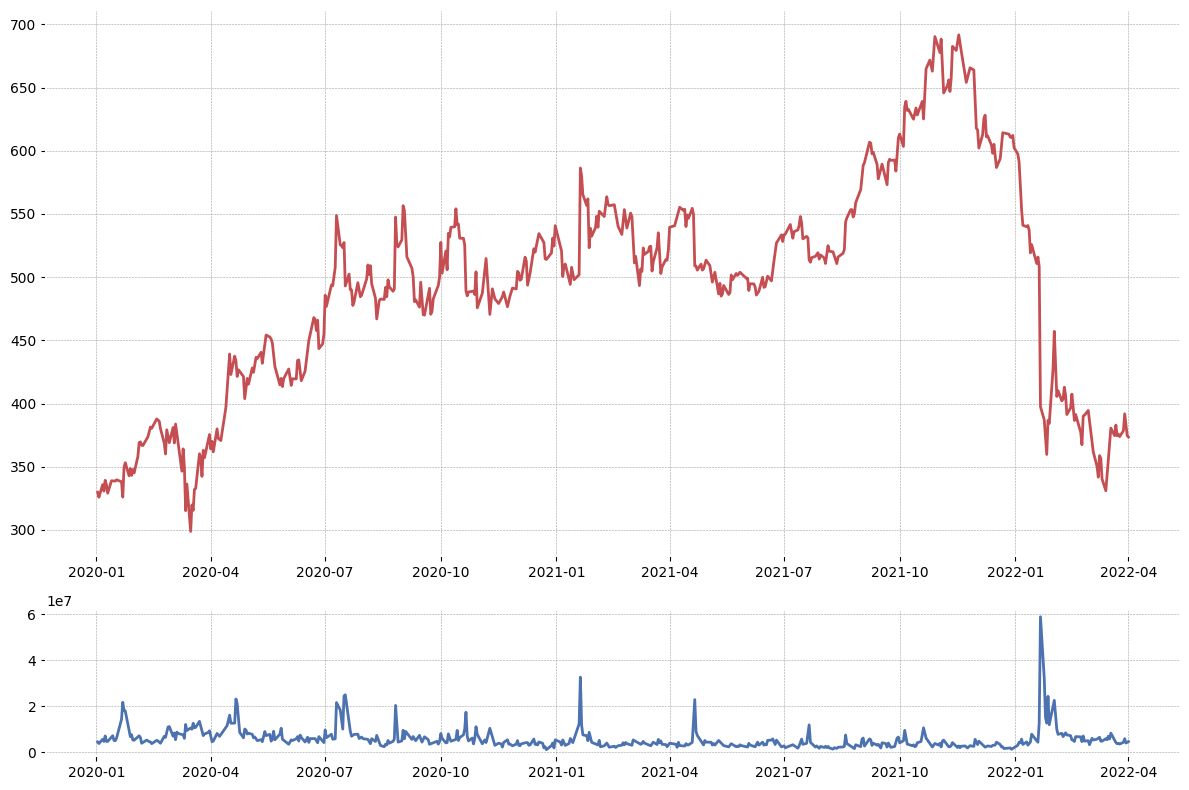

In [167]:
# Netflix 종가와 거래량
fig = plt.figure(figsize=(12, 8))
top_axes = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan=4) # 종가
bottom_axes = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4) # 거래량

top_axes.plot(nfi.index, nfi['Adj Close'], label='Adjusted Close', color='r')
bottom_axes.plot(nfi.index, nfi['Volume'], label='Volume', color='b')

plt.tight_layout() #그래프 크기를 자동으로 조절하는 함수
plt.show()

In [168]:
nfic = nfi['2022']
nfic

/var/folders/j6/m7t5m6h978134_qwyw9q1nw00000gn/T/ipykernel_806/3493996457.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  nfic = nfi['2022']


,Date,High,Low,Open,Close,Volume,Adj Close,Name
nfdate,,,,,,,,
2022-01-03,2022-01-03,609.989990,590.559998,605.609985,597.369995,3067500.0,597.369995,Netflix
2022-01-04,2022-01-04,600.409973,581.599976,599.909973,591.150024,4393100.0,591.150024,Netflix
2022-01-05,2022-01-05,592.840027,566.880005,592.000000,567.520020,4148700.0,567.520020,Netflix
2022-01-06,2022-01-06,563.359985,542.010010,554.340027,553.289978,5711800.0,553.289978,Netflix
2022-01-07,2022-01-07,553.429993,538.219971,549.460022,541.059998,3382900.0,541.059998,Netflix
...,...,...,...,...,...,...,...,...
2022-03-28,2022-03-28,380.279999,366.730011,375.230011,378.510010,4323400.0,378.510010,Netflix
2022-03-29,2022-03-29,396.500000,380.329987,384.390015,391.820007,5880700.0,391.820007,Netflix
2022-03-30,2022-03-30,392.700012,378.630005,389.549988,381.470001,4023300.0,381.470001,Netflix


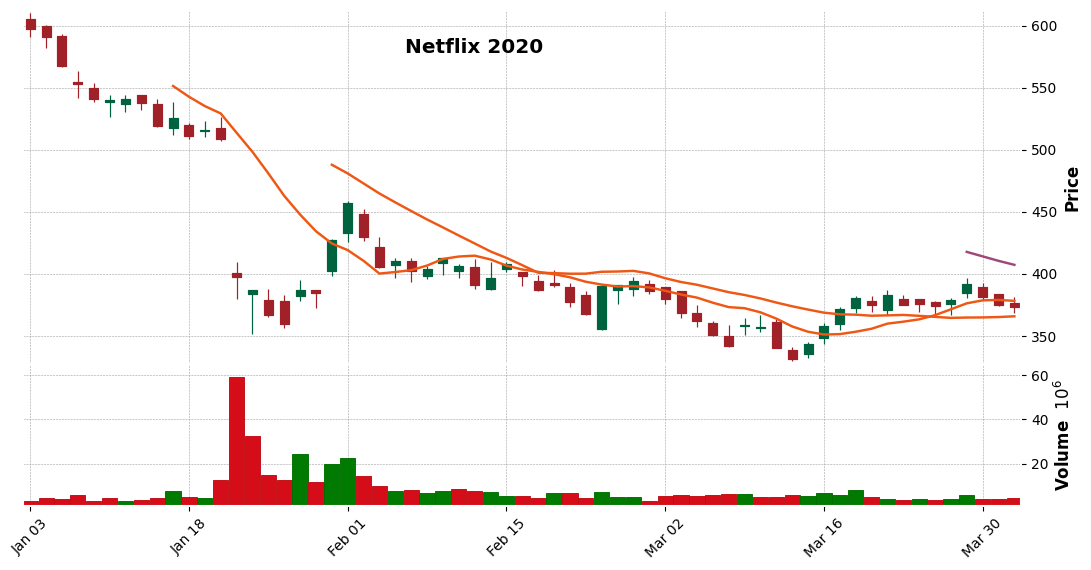

In [169]:
# Netflix 2022 주가 캔들차트
mpf.plot(nfic, 
         type='candle', # 캔들차트
         mav=(10, 20, 60), # 10일, 20일, 60일 이동 평균선
         volume=True, # 거래량
         style='charles', # 그래프 스타일
         title='Netflix 2020', # 그래프 타이틀
         figratio=(10,5), # 그래프 크기
         tight_layout=True) # 좌우 공백제거
plt.show()

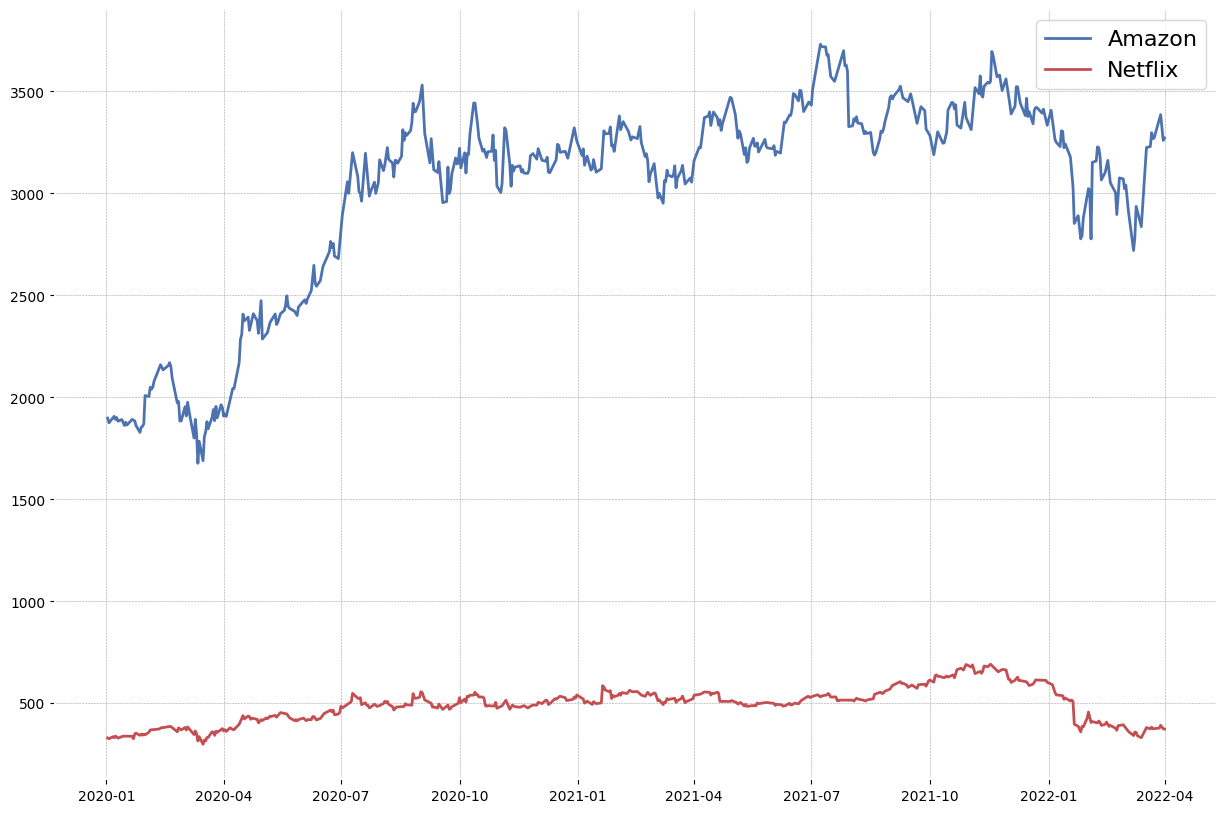

In [170]:
# Amzon, Netflix 주식 종가 비교
plt.figure(figsize=(15,10)) 
plt.plot(azi['Close'], label="Amazon", color='b') 
plt.plot(nfi['Close'], label="Netflix", color='r') 
plt.legend(fontsize=16) # 오른쪽 상단 label 상자의 폰트사이즈 조절
plt.show()

In [171]:
gg['ggdate'] = pd.to_datetime(gg['Date'])
ggi = gg.set_index(gg['ggdate'])
ggi['2020']

/var/folders/j6/m7t5m6h978134_qwyw9q1nw00000gn/T/ipykernel_806/2469169263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gg['ggdate'] = pd.to_datetime(gg['Date'])
/var/folders/j6/m7t5m6h978134_qwyw9q1nw00000gn/T/ipykernel_806/2469169263.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  ggi['2020']


,Date,High,Low,Open,Close,Volume,Adj Close,Name,ggdate
ggdate,,,,,,,,,
2020-01-02,2020-01-02,1368.680054,1346.489990,1348.410034,1368.680054,1363900.0,1368.680054,Google,2020-01-02
2020-01-03,2020-01-03,1373.750000,1347.319946,1348.000000,1361.520020,1170400.0,1361.520020,Google,2020-01-03
2020-01-06,2020-01-06,1398.319946,1351.000000,1351.630005,1397.810059,2338400.0,1397.810059,Google,2020-01-06
2020-01-07,2020-01-07,1403.500000,1391.560059,1400.459961,1395.109985,1716500.0,1395.109985,Google,2020-01-07
2020-01-08,2020-01-08,1411.849976,1392.630005,1394.819946,1405.040039,1765700.0,1405.040039,Google,2020-01-08
...,...,...,...,...,...,...,...,...,...
2020-12-24,2020-12-24,1742.410034,1724.349976,1729.000000,1734.160034,465600.0,1734.160034,Google,2020-12-24
2020-12-28,2020-12-28,1787.000000,1741.819946,1744.910034,1773.959961,1382500.0,1773.959961,Google,2020-12-28
2020-12-29,2020-12-29,1788.469971,1755.109985,1787.229980,1757.760010,986300.0,1757.760010,Google,2020-12-29


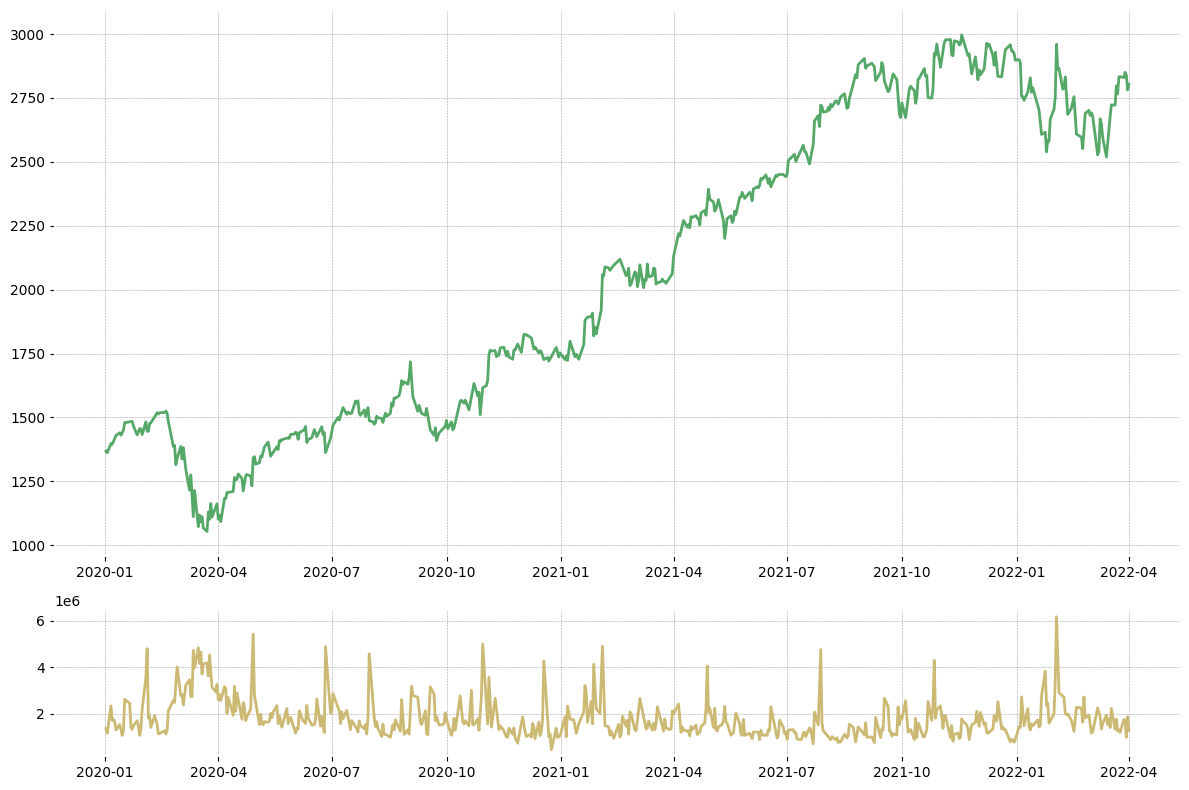

In [172]:
# Google 종가와 거래량
fig = plt.figure(figsize=(12, 8))
top_axes = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan=4) # 종가 그래프
bottom_axes = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4) # 거래량 그래프

top_axes.plot(ggi.index, ggi['Adj Close'], label='Adjusted Close', color='g') # Google 종가
bottom_axes.plot(ggi.index, ggi['Volume'], label='Volume', color='y') # Google 거래량

plt.tight_layout() #그래프 크기를 자동으로 조절하는 함수
plt.show()

In [173]:
ggic = ggi['2022']
ggic

/var/folders/j6/m7t5m6h978134_qwyw9q1nw00000gn/T/ipykernel_806/2470230696.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  ggic = ggi['2022']


,Date,High,Low,Open,Close,Volume,Adj Close,Name,ggdate
ggdate,,,,,,,,,
2022-01-03,2022-01-03,2917.020020,2874.260010,2901.100098,2899.830078,1432300.0,2899.830078,Google,2022-01-03
2022-01-04,2022-01-04,2929.699951,2874.330078,2907.919922,2887.989990,1420000.0,2887.989990,Google,2022-01-04
2022-01-05,2022-01-05,2889.989990,2753.760010,2888.399902,2755.500000,2730900.0,2755.500000,Google,2022-01-05
2022-01-06,2022-01-06,2798.800049,2731.169922,2739.969971,2754.949951,1867400.0,2754.949951,Google,2022-01-06
2022-01-07,2022-01-07,2768.969971,2715.330078,2762.909912,2740.340088,1488000.0,2740.340088,Google,2022-01-07
...,...,...,...,...,...,...,...,...,...
2022-03-28,2022-03-28,2840.050049,2796.229980,2818.010010,2829.110107,1752500.0,2829.110107,Google,2022-03-28
2022-03-29,2022-03-29,2875.870117,2840.770020,2852.949951,2850.110107,1715900.0,2850.110107,Google,2022-03-29
2022-03-30,2022-03-30,2854.409912,2832.000000,2849.199951,2838.770020,994200.0,2838.770020,Google,2022-03-30


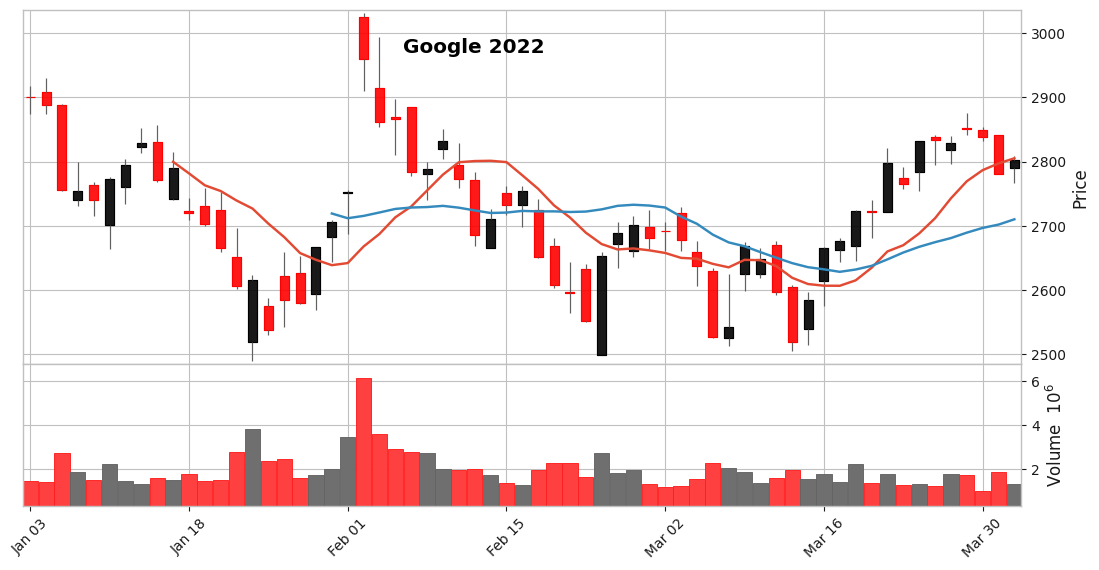

In [174]:
# Google 2022 주가 캔들차트
# Google 거래량이 가장 높았던 기간
mpf.plot(ggic, 
         type='candle', # 캔들차트
         mav=(10, 20), # 10일, 20일 이동 평균선
         volume=True, # 거래량
         style='checkers', # 그래프 스타일
         title='Google 2022', # 그래프 타이틀
         figratio=(10,5), # 그래프 크기
         tight_layout=True) # 좌우 공백제거
plt.show()

In [175]:
# 각 기업 2021년 데이터만 추출
fb1 = fbi['2021']
ap1 = api['2021']
az1 = azi['2021']
nf1 = nfi['2021']
gg1 = ggi['2021']

/var/folders/j6/m7t5m6h978134_qwyw9q1nw00000gn/T/ipykernel_806/3998004940.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  fb1 = fbi['2021']
/var/folders/j6/m7t5m6h978134_qwyw9q1nw00000gn/T/ipykernel_806/3998004940.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  ap1 = api['2021']
/var/folders/j6/m7t5m6h978134_qwyw9q1nw00000gn/T/ipykernel_806/3998004940.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  az1 = azi['2021']
/var/folders/j6/m7t5m6h978134_qwyw9q1nw00000gn/T/ipykernel_80

In [176]:
# 2021년 종가 데이터프레임 생성
df = pd.DataFrame({
                    'Facebook' : fb1['Adj Close'],
                    'Apple' : ap1['Adj Close'],
                    'Amazon' : az1['Adj Close'],
                    'Netflix' : nf1['Adj Close'],
                    'Google' : gg1['Adj Close']
                    })
df

,Facebook,Apple,Amazon,Netflix,Google
2021-01-04,268.940002,128.453461,3186.629883,522.859985,1726.130005
2021-01-05,270.970001,130.041626,3218.510010,520.799988,1740.050049
2021-01-06,263.309998,125.664207,3138.379883,500.489990,1722.880005
2021-01-07,268.739990,129.952286,3162.159912,508.890015,1774.339966
2021-01-08,267.570007,131.073944,3182.699951,510.399994,1797.829956
...,...,...,...,...,...
2021-12-27,346.179993,180.100540,3393.389893,613.119995,2958.129883
2021-12-28,346.220001,179.061859,3413.219971,610.710022,2933.739990
2021-12-29,342.940002,179.151749,3384.020020,610.539978,2933.100098
2021-12-30,344.359985,177.973251,3372.889893,612.090027,2924.010010


In [177]:
# 상관관계 분석
df1 = df.corr(method='pearson')
df1

,Facebook,Apple,Amazon,Netflix,Google
Facebook,1.000000,0.557766,0.655369,0.266587,0.832702
Apple,0.557766,1.000000,0.609092,0.671873,0.796742
Amazon,0.655369,0.609092,1.000000,0.402158,0.626935
Netflix,0.266587,0.671873,0.402158,1.000000,0.667988
Google,0.832702,0.796742,0.626935,0.667988,1.000000


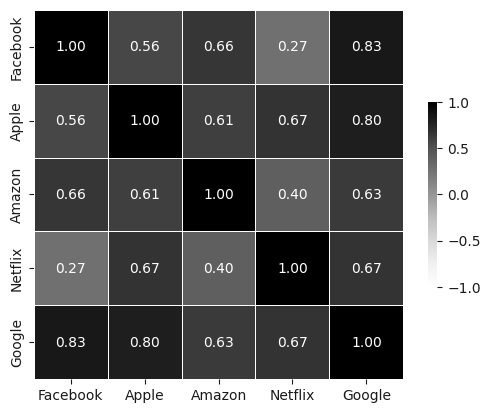

In [178]:
# 상관관계 분석 heatmap 시각화
sb.heatmap(df1,
           cmap='Greys', # 색상
           annot=True, # 상관계수 값 표시
           linewidths=.5, # 경계면 구분
           fmt='.2f', # 소수점 2자리 까지 표시
           cbar_kws={"shrink": .5}, #컬러바 크기 반으로 줄이기
           square=True, # Ture=정사각형, False=직사각형
           vmin=-1, vmax=1 # 컬러바 범위
            )
plt.show()

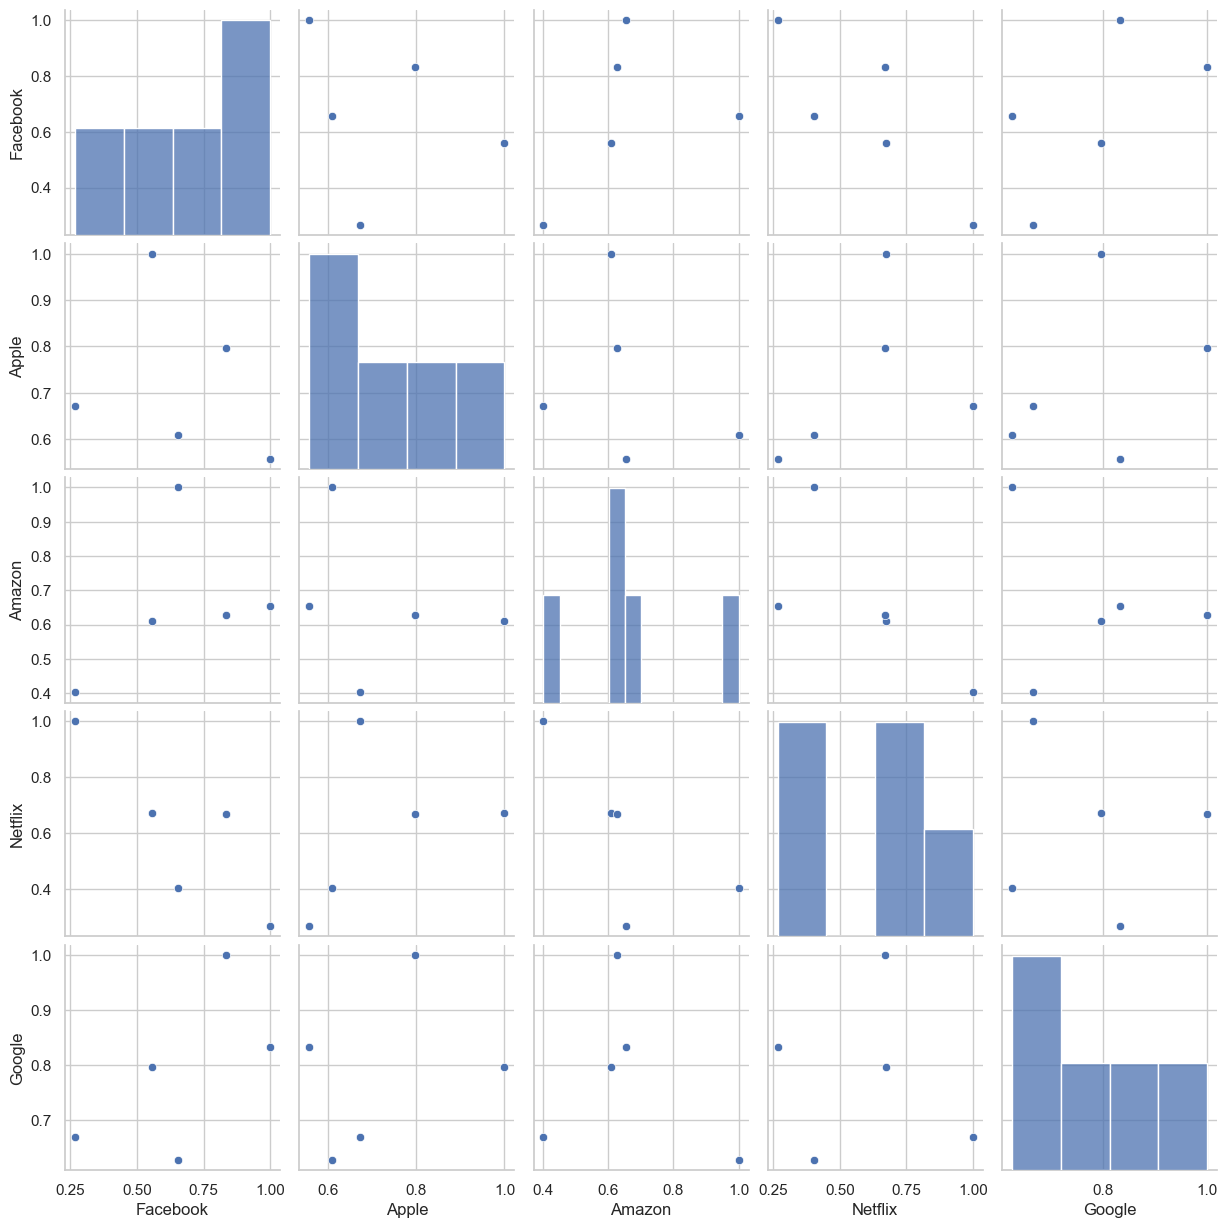

In [179]:
# pairplot 시각화
# 맞게 됐는지 잘 모르겠음...
sb.set(style='whitegrid')
sb.pairplot(df1)
plt.show()